<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/FUNDAMENTALS/16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16. 선형 회귀와 로지스틱 회귀

## 16-1. 회귀(Regression)에 대하여

### 회귀분석이란?
**회귀분석(Regression Analysis)**이란 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법이다.

**회귀 분석으로 풀 수 있는 문제**
- 부모의 키와 자식의 키 사이의 관계
- 자동차의 스펙을 이용한 가격 예측
- 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측

위에서 제시된 문제는 모두 **독립변수(independent variable)**와 **종속변수(dependent variable)** 사이의 상호 관련성을 규명하는 것들이다. 독립변수와 종속변수는 각각 **설명변수(explanatory variable)**, **반영변수(reponsible variable)**라보 불리기도 한다.




**회귀(Regression)**라는 개념을 처음 제시한 사람은 영국의 우생학자 F.Galton(1822~1911)이다.

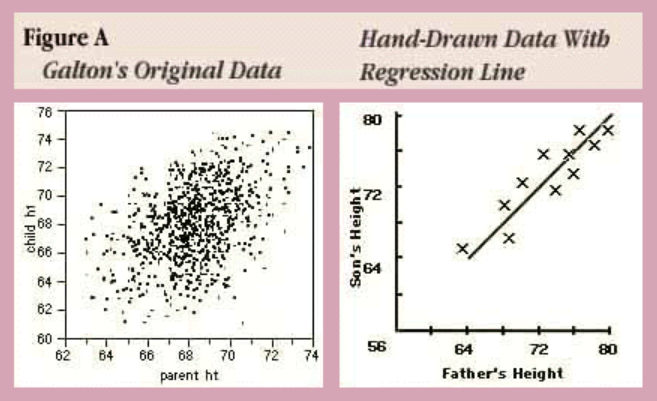

Galton은 아버지의 키 $x$와 자식의 키 $y$ 사이의 직선 형태의 기울기가 1보다 작다는 것에 주목하였는데, 이것은 세대를 거듭할수록 아버지의 키가 크든 작든 무관하게 자식의 키는 전체 평균에 수렴하게 된다는 것을 의미한다.

그래서 그는 통계적으로 평균으로 회귀(regression)한다는 뜻에서 회귀(Regression)라는 개념을 처음 제시한 것이었다고한다.

하지만 오늘날 회귀분석이란 단순히 평균으로 수렴하는 현상을 넘어서서, 두 개 이상의 변수 사이의 함수관계를 추구하는 통계적 방법을 의미하게 된다.

위 그림에서 본 것처럼 두 변수 사이의 관계를 직선 형태로 가정하고 분석하는 것을 **선형 회귀분석(Linear Regression)**이라고 한다.

선형 회귀분석은 간단하면서도 실생활에 적용되는 경우가 정말 많기 때문에 선형 회귀분석의 기본 가정 내에 문제가 들어온다면 일단 먼저 회귀 분석을 시도해볼 만큼 문제를 해결할 때 많이 이용하게 되는 보편적인 방식이다.

- [선형 회귀분석의 4가지 기본가정](https://kkokkilkon.tistory.com/175)
    - 선형성
    - 독립성
    - 등분상성
    - 정규성



- [선형 회귀 모델에서 선형성](https://brunch.co.kr/@gimmesilver/18)
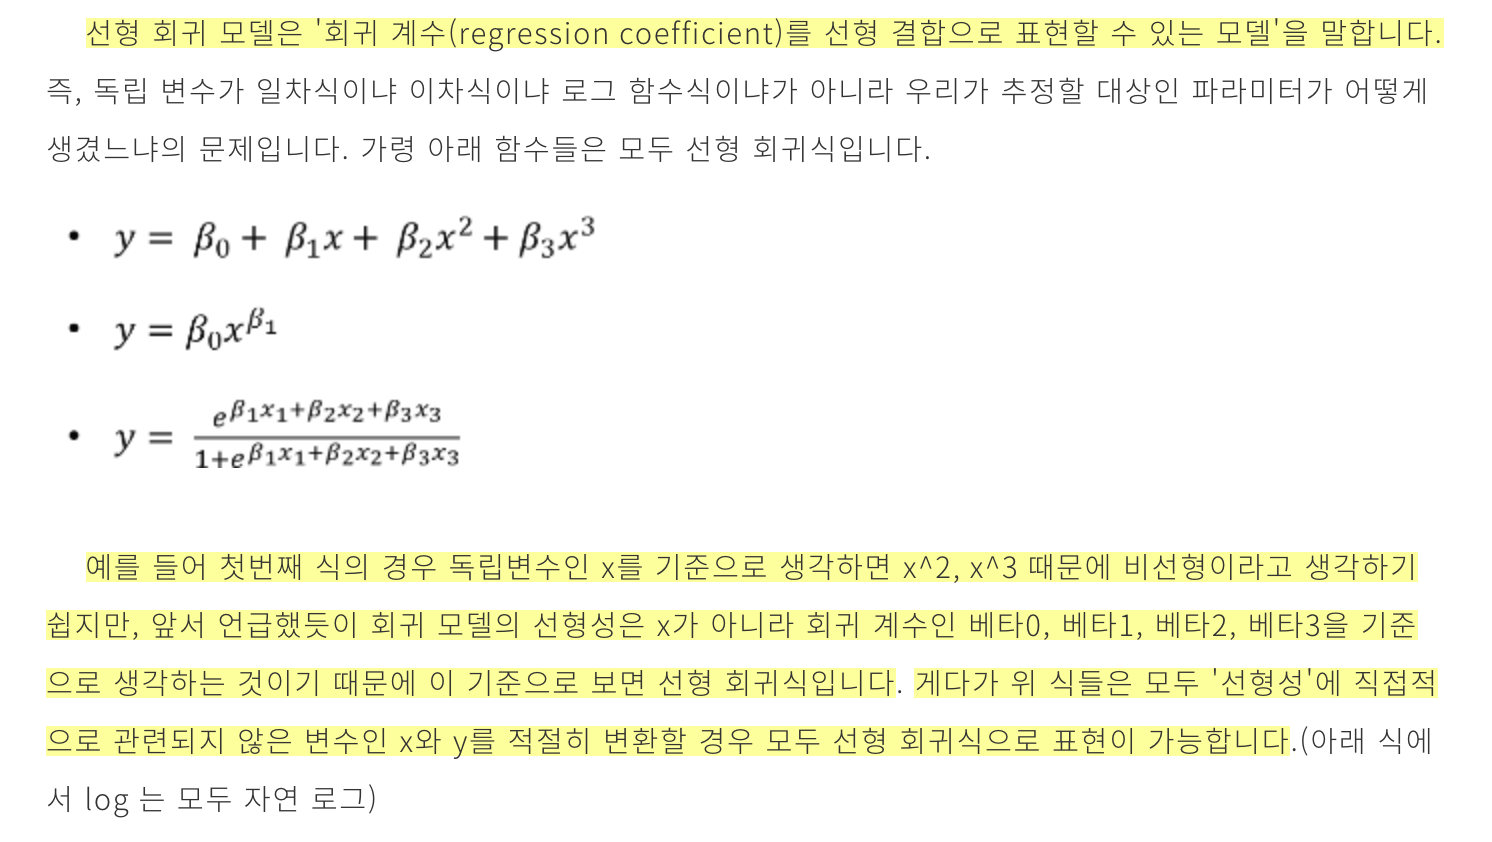

### 지도학습의 두 종류: 분류와 회귀
- 분류 : 데이터 xx의 여러 feature 값들을 이용하여 해당 데이터의 클래스 $y$를 추론하는 것
- 회귀 : 데이터 xx의 여러 feature 값들을 이용하여 연관된 다른 데이터 $y$의 정확한 값을 추론하는 것

## 16-2. 선형 회귀 분석(Linear Regression)



### 1. 선형 회귀 모델링
**선형 회귀(linear regression)**은 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법이다.

$$y = \beta x + \epsilon$$

- 여기서 $\beta$는 **회귀계수**라고 불리며, $\epsilon$은 종속 변수와 독립 변수 사이에 **오차**를 의미한다. 이들은 우리가 데이터로부터 추정해야 하는 **파라미터**가 된다.
- 결국 우리는 $x$와 $y$에 해당하는 데이터가 있을 때, 이러한 데이터로부터 $\beta$와 $\epsilon$를 추정한 후 추정한 값들을 바탕으로 모델링을 수행한다. 
- 그 다음 해당 모델을 기반으로 새로운 데이터의 $x$ 값들을 입력으로 넣어주었을 떄, 그에 해당하는 $y$ 값을 추론하게 되는 것이다. 
- 결국 선형회귀 모델을 찾는다는 것은 주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것을 의미한다.

### 2. 머신러닝에서의 선형회귀모델 표기법
위에서 표현했던 선형회귀 모델을 머신러닝 기반의 방법에서는 조금 다른 변수값을 써서 표현한다.
$$H = Wx + b$$

- $H$를 **가정(Hypothesis)**, $W$를 **가중치(Weight)**, $b$를 **편향(bias)**로 명명한다. 
- 머신러닝 혹은 딥런이 기법을 잉요해서 회귀 모델을 구한다는 의미는 주어진 데이터를 이용하여 $W$와 $b$를 구한다는 의미이다.
- 위의 회귀 모델에서의 회귀계수 $\beta$ 값이 $W$, 에러 값이 $b$에 해당하는 것이다.
- 대부분의 $W$, $b$는 단순 스칼라 값이 아닌 고차원의 행렬(matrix) 형태를 띄고 있는 경우가 많고, 이 파라미터의 개수가 많을 수록 모델이 크기는 커지고 학습하는 것은 어렵다.



### 3. 용어 설명
**잔차(Residuals)**란 **회귀모델을 이용해 추정한 값과 실제 데이터의 차이**를 의미한다.

**최소제곱법**은 이 잔차를 이용하여 주어진 점 데이터들을 가장 잘 설명하는 회귀모델을 찾는 가장 대표적인 방법 중 하나이다.
$$argmin_{W, b}(\sum_{i = 1}^{n}{residuals}^2)$$
즉, **n개의 점 데이터에 대하여 잔차의 제곱의 합을 최소로 하는 W, b를 구하는 방법이다.**

머신러닝에서는 최소제곱법과 같은 회귀계수를 구하는 과정에 쓰는 함수를 **손실함수(Loss function)**이라고 한다.

또한 회귀 모델이 잘 결정되었는지 확인할 때 참고하는 지표로 **결정계수**(**R-squared**, 또는 **R2 score** 등으로 표기)가 있다. 이는 0에서 1 사이의 값으로 나타나는데, 1에 가까울수록 해당 회귀모델이 데이털르 잘 표현한다고 볼 수 있다.



### 4. 데이터셋 준비하기(Boston house prices dataset)

In [1]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']

x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names']) # dataframe으로 변환
print(f"boston dataset의 차원: {data.shape}")
print(f"price의 차원: {price.shape}")
print(f"boston train dataset의 차원: {x_train.shape}")
print(f"boston test dataset의 차원: {x_test.shape}")

df.head()

boston dataset의 차원: (506, 13)
price의 차원: (506,)
boston train dataset의 차원: (404, 13)
boston test dataset의 차원: (102, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
1,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
2,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
3,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
4,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79


In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 5. Boston Dataset에서 Linear Regression 적용해보기

In [20]:
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

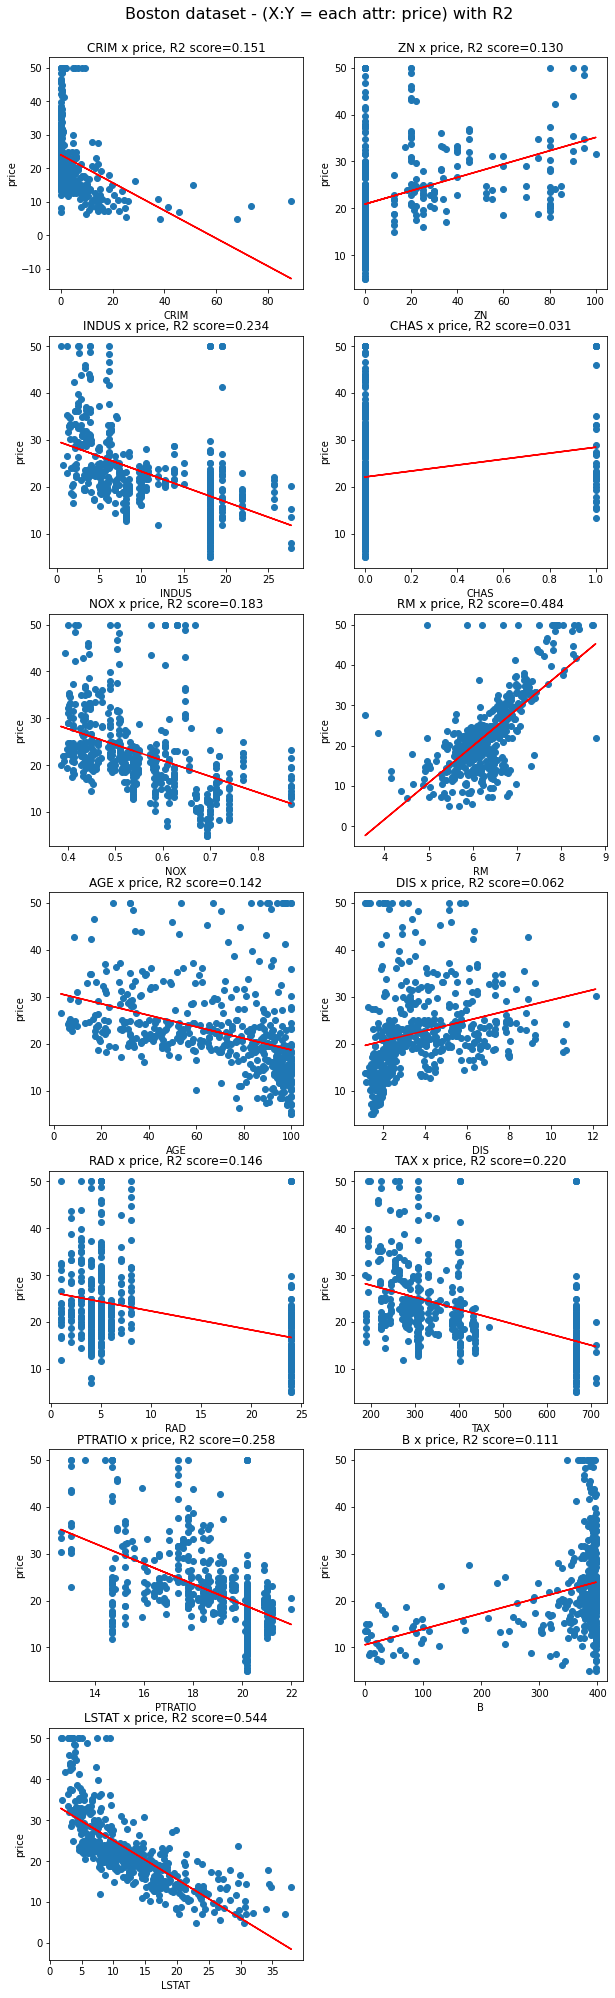

In [21]:
fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번쨰 attribute(column)을 살펴본다
    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름

    lr = LinearRegression() # Linaer Regression Model
    lr.fit(single_attr, price) # 단일 컬럼 데이터로 학습
    pred_price = lr.predict(single_attr) # 예측값
    score = metrics.r2_score(price, pred_price)  # 결정 계수 구하는 함수

    # 캔버스 todjtd
    ax = fig.add_subplot(7, 2, i + 1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

### 6. 경사 하강법(Gradient Descent Algorithm)
머신러닝에서는 가중치의 그레디언트(미분값)가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라는 가정을 한다.

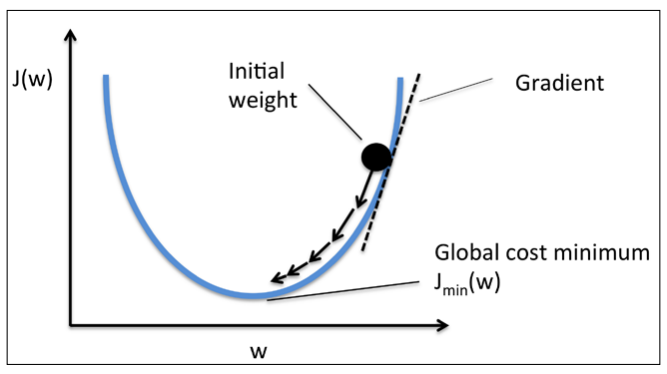

최소 지점으로 가기 위해 그레디언트 값은 다음과 같은 식으로 업데이트 한다.
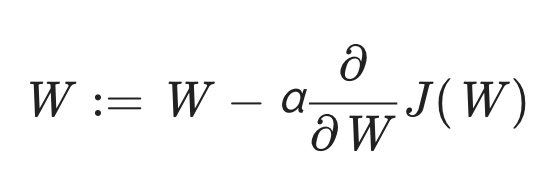

- 여기서 \alpha에 해당하는 값이 **learning rate** 라는 것이다.

learning rate가 너무 크면 최적의 W 값을 건너 뛰게 되어 수렴하지 못하고, 너무 작으면 학습에 시간이 오래걸리게 된다.